## Requirements

In [19]:
from datasets import load_dataset, load_from_disk
import matplotlib.pyplot as plt
import torch

## Reading data

Load the dataset, make sure to specify `'webdataset'` as the first argument to ensure the correct dataset builder is used.  The directory contains TAR files of images.

In [2]:
data = load_dataset('webdataset', data_dir='tmp_img_tars/')

The dataset gives access to individual images (and metadata) using its index.

In [3]:
data['train'][0]

{'__key__': 'img000001',
 '__url__': '/home/gjb/Projects/IO-performance/source-code/image-data/tmp_img_tars/negative.tar',
 'tiff': <PIL.Image.Image image mode=RGBA size=1152x648>}

The image itself is stored in the `tiff` column.

In [4]:
img = data['train'][0]['tiff']

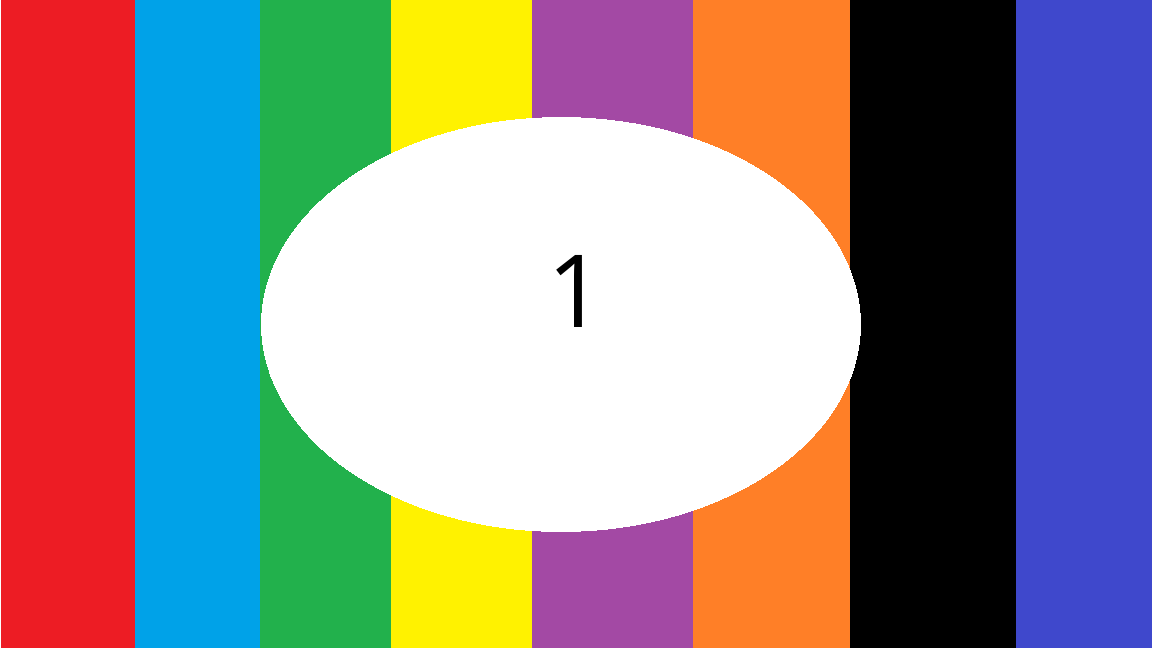

In [5]:
img

Note that the type of the image is a PIL `Image` object.

In [6]:
type(img)

PIL.Image.Image

There are indeed 250 images in the training set.

In [7]:
len(data['train'])

250

## Pytorch tensors

In [8]:
dataset = data.with_format('torch')

In [10]:
dataset.save_to_disk('tmp_img_torch')

Saving the dataset (0/1 shards):   0%|          | 0/250 [00:00<?, ? examples/s]

In [13]:
d = load_from_disk('tmp_img_torch')

In [17]:
img = d['train'][0]['tiff']

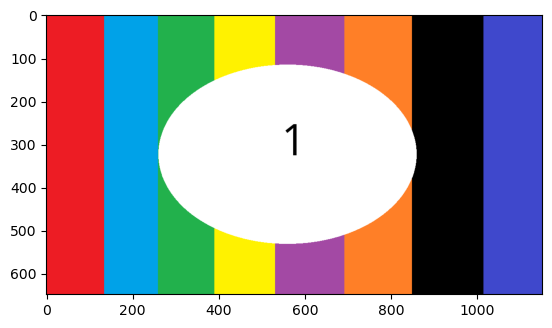

In [22]:
plt.imshow(img.permute(1, 2, 0))